In [1]:
%matplotlib inline

import subprocess
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Markdown, Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# brew or apt-get to intall graphviz; TODO: linux test, exit codes 
p = subprocess.Popen('if [ -L "/usr/local/bin/brew" ]; then brew install graphviz;\
                      elif [ -f "/usr/bin/apt-get" ]; then apt-get install graphviz;\
                      else echo "Could not install graphviz"; fi;', shell=True, 
                      stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

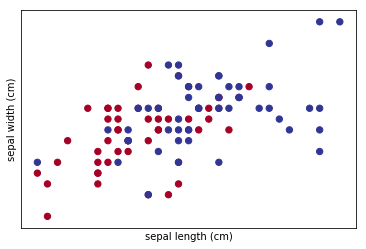

In [2]:
def load_data(iris):
    """Data loader
    
    Returns array of arrays of feature measurements and an array for a target
    keeping only Iris virginica and Iris versicolor classes
    """
    target_n = iris.target_names[1:3] 
    X = iris.data[[t==1 or t==2 for t in iris.target]]
    y = iris.target[[t==1 or t==2 for t in iris.target]]
    
    return X,y

# load a popular Fisher's data set
iris = load_iris()
X,y = load_data(iris)

# only 2 features selected to simplify visualisation
feat_n = iris.feature_names[0:2]
X = X[:,:2]

# leave 5% of data for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=1)

def plot_2d_scatter(X, y, feature_names):
    """Scatterplot with class information
    
    Displays a scatter plot of first 2 dimensions of X
    given a vector of target class values y
    """
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu);
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.xticks(())
    plt.yticks(())
    plt.show()

plot_2d_scatter(X, y, feat_n)

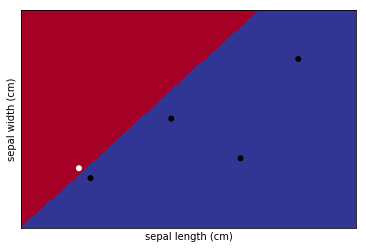

In [3]:
def plot_2d_scatter_predictions(X, y, model, feature_names):
    """Use a model to demonstrate space partitioning
    
    Displays a scatter plot of first 2 dimensions of X
    given a vector of target class values y and
    given a model used to make predictions for all points in a mesh
    """
    # to plot a decision boundary create a mesh for all points in 2d
    # mesh dimensions are [x_min,x_max] and [y_min,y_max]
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    # step size in the mesh
    h = 0.01  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # make prediction
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # put the result into a color plot
    y_hat = y_hat.reshape(xx.shape)
    plt.pcolormesh(xx, yy, y_hat, cmap=plt.cm.RdYlBu)

    # plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='none', cmap=plt.cm.binary)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.xticks(())
    plt.yticks(())
    plt.show()

logreg = LogisticRegression().fit(X_train, y_train)
plot_2d_scatter_predictions(X_test, y_test, logreg, feat_n)

In [4]:
Markdown("""### Logistic regression - average accuracy on 50 runs = **{accuracy}%**""".format(
    accuracy=np.round(np.mean(cross_val_score(logreg, X, y, cv=50)), decimals=3) * 100))

### Logistic regression - average accuracy on 50 runs = **68.0%**

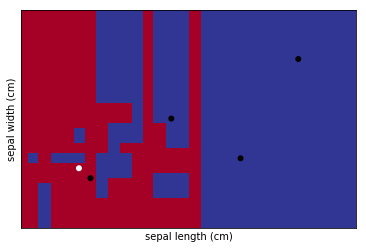

In [5]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
plot_2d_scatter_predictions(X_test, y_test, clf, feat_n)

In [6]:
Markdown("""### Decision tree - average accuracy on 50 runs = **{accuracy}%**""".format(
    accuracy=np.round(np.mean(cross_val_score(clf, X, y, cv=50)), decimals=3) * 100))

### Decision tree - average accuracy on 50 runs = **54.0%**

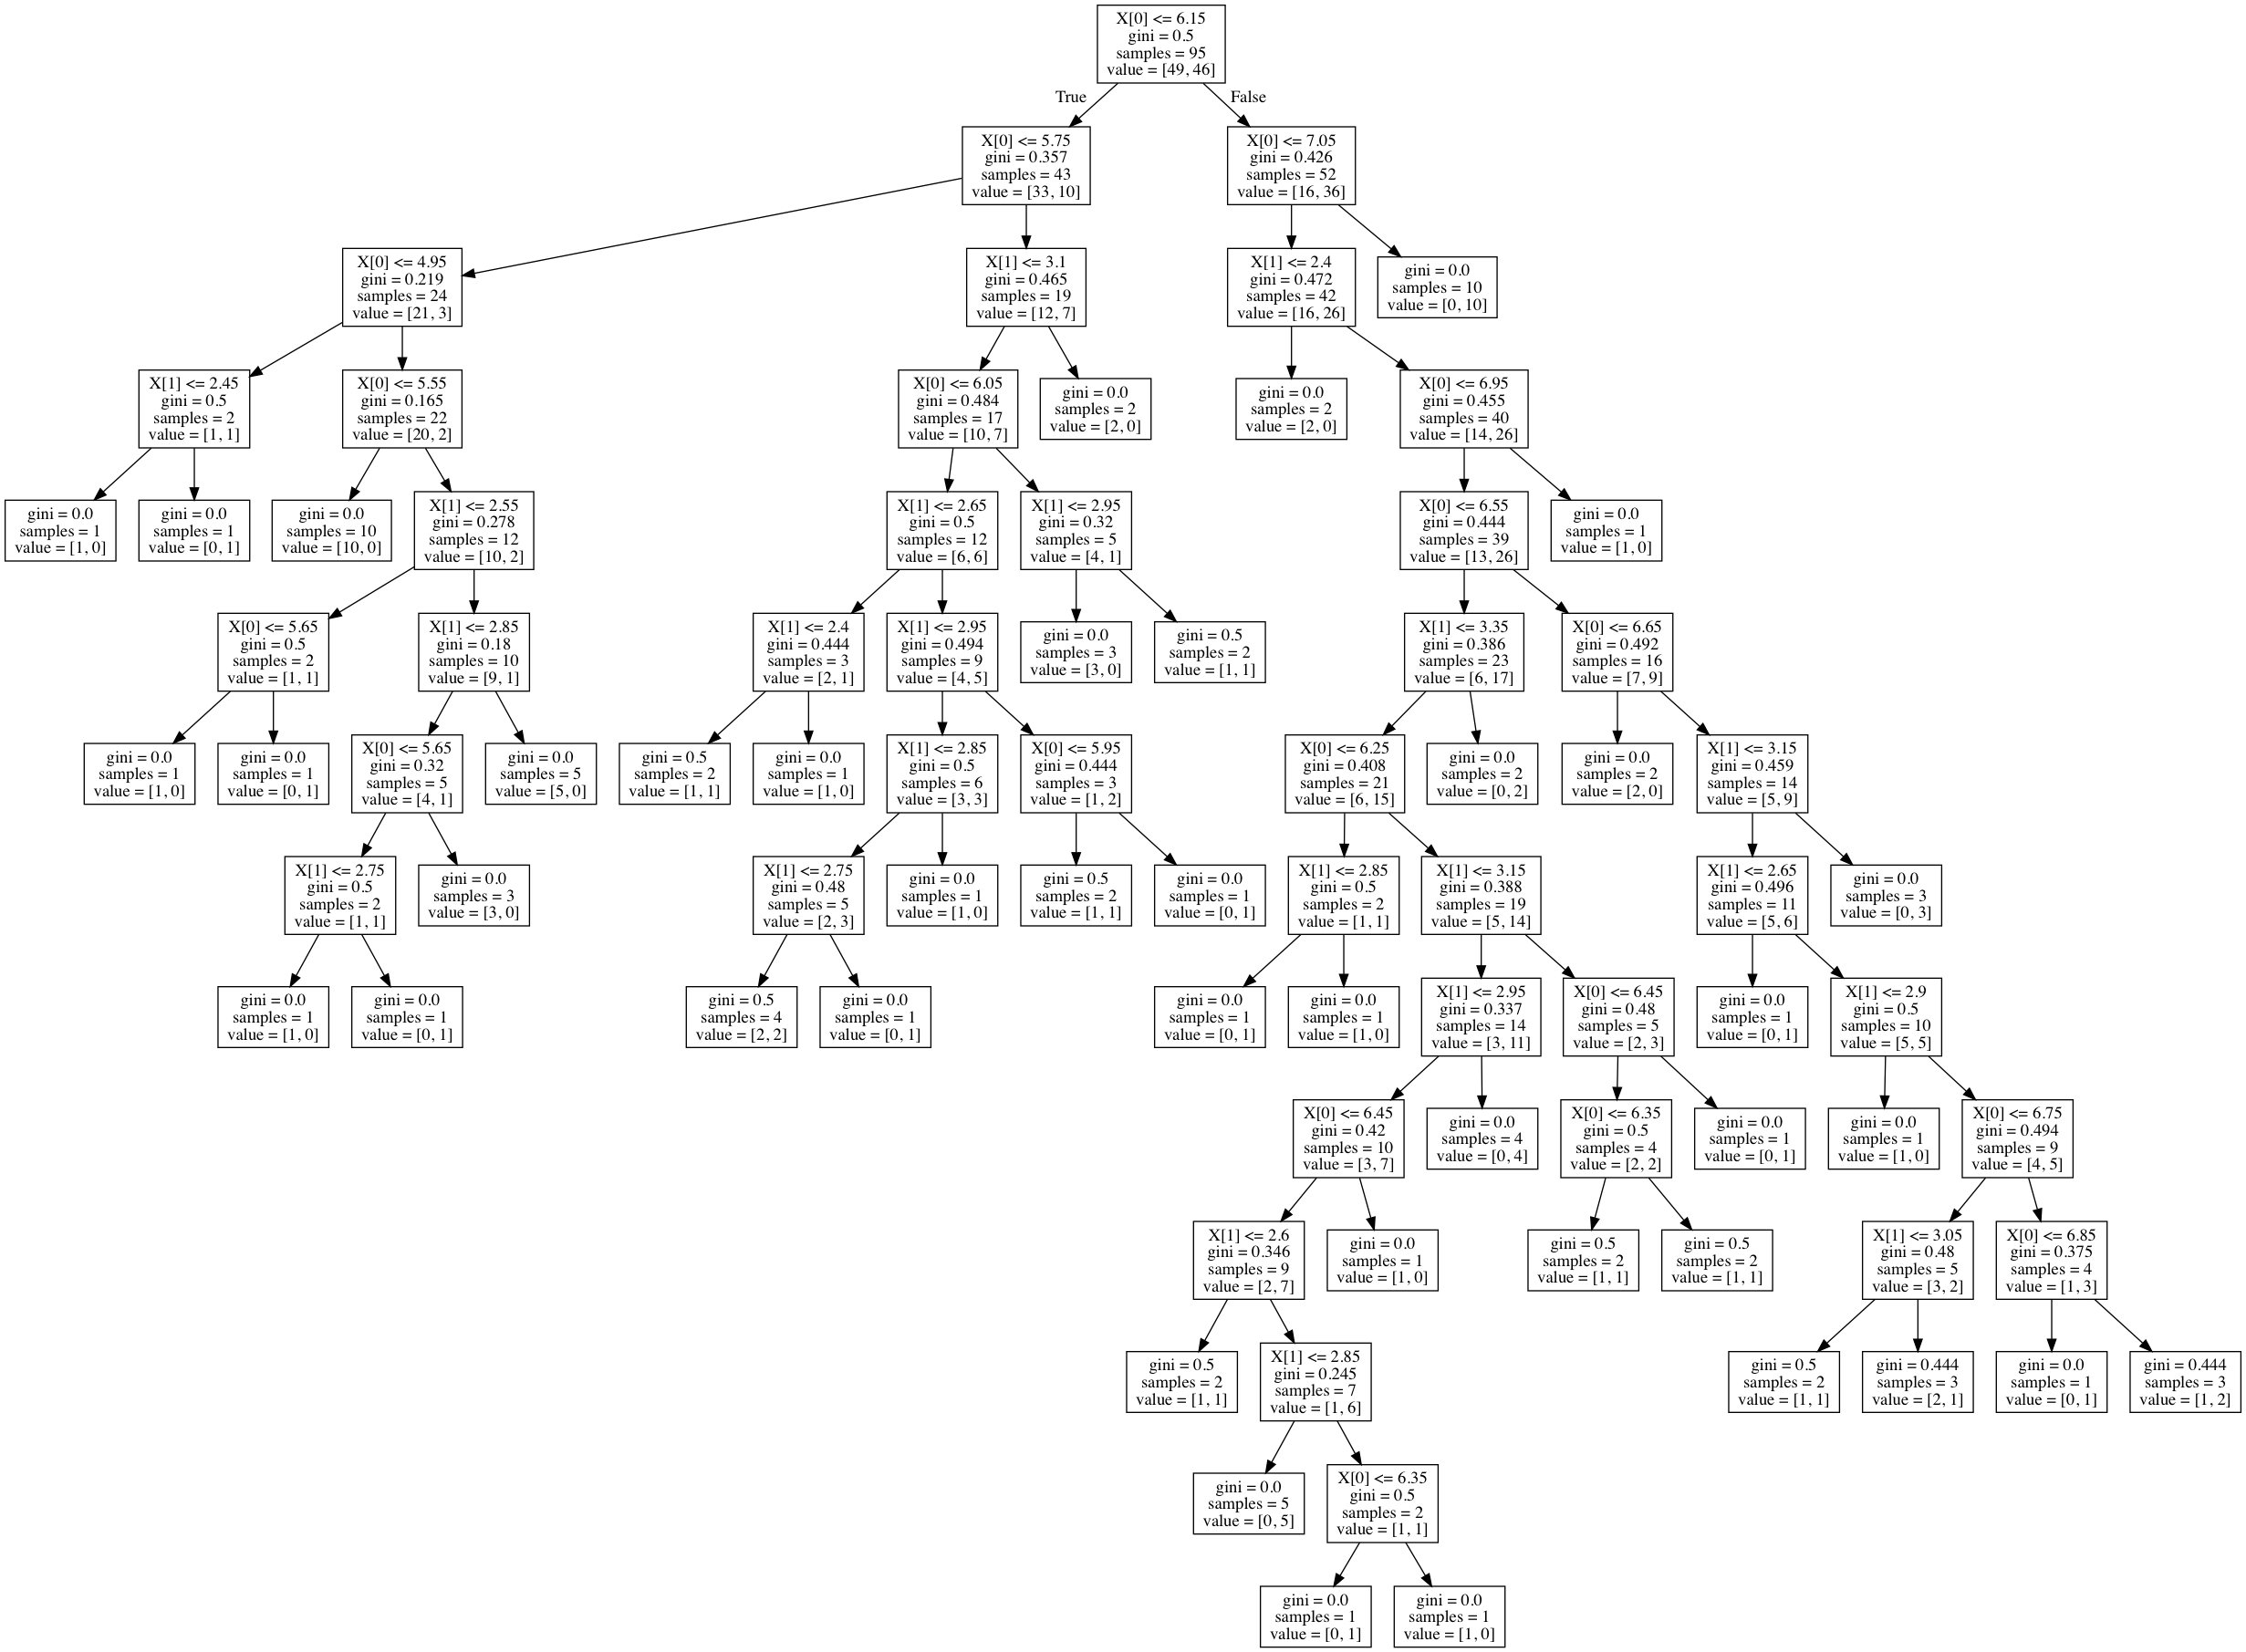

In [7]:
def plot_tree(model):
    """Generate a tree visualisation export
    
    Returns a full tree of a corresponding sklean model
    use IPython.display.Image() for showing it in jupyter
    """
    dt_full = tree.export_graphviz(model, out_file = None)
    pydot_full = pydotplus.graph_from_dot_data(dt_full)
    return pydot_full.create_png()

Image(plot_tree(clf))

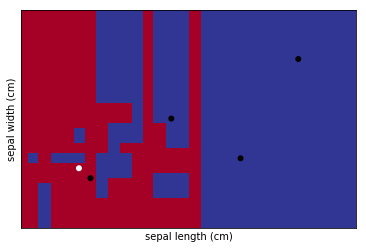

In [14]:
# Max depth of the tree
clf_max_d_3 = DecisionTreeClassifier(max_depth=3, 
                                     criterion="entropy", 
                                     min_samples_split=4).fit(X_train, y_train)
plot_2d_scatter_predictions(X_test, y_test, clf, feat_n)

In [15]:
Markdown("""### Decision tree - average accuracy on 50 runs = **{accuracy}%**""".format(
    accuracy=np.round(np.mean(cross_val_score(clf_max_d_3, X, y, cv=50)), decimals=3) * 100))

### Decision tree - average accuracy on 50 runs = **71.0%**

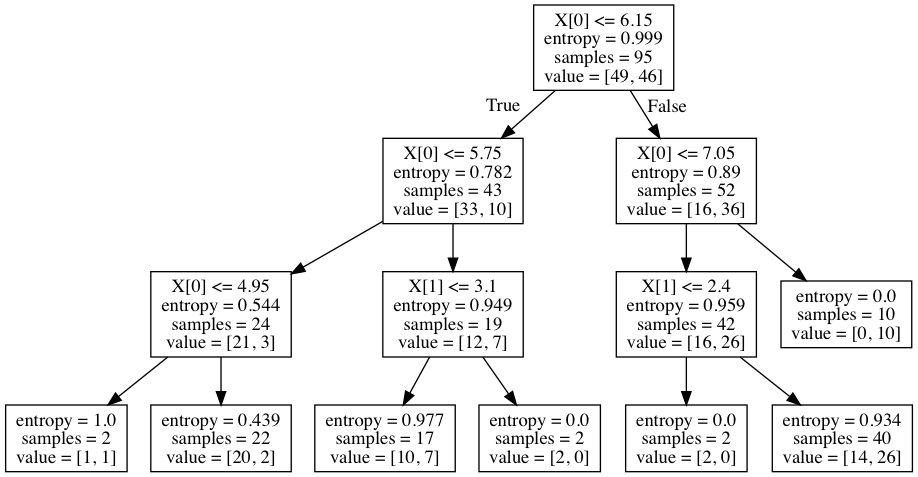

In [16]:
Image(plot_tree(clf_max_d_3))

In [ ]:
X,y = load_data(iris)

# only 2 features kept to simplify visualisation
feat_n = iris.feature_names[1:3]
X = X[:, 1:3]

# leave 5% of data for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=1)

plot_2d_scatter(X, y, feat_n)